In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
import os
paths=[]
labels=[]
for dirname, _, filenames in os.walk("C:\\Users\\Acer\\Downloads\\archive (25)\\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split("_")[-1]
        label=label.split(".")[0]
        labels.append(label.lower())
print("Dataset is loaded")

Dataset is loaded


In [3]:
df=pd.DataFrame()
df['speech']=paths
df['Labels']=labels
df.head()

,speech,Labels
0,C:\Users\Acer\Downloads\archive (25)\TESS Toro...,angry
1,C:\Users\Acer\Downloads\archive (25)\TESS Toro...,angry
2,C:\Users\Acer\Downloads\archive (25)\TESS Toro...,angry
3,C:\Users\Acer\Downloads\archive (25)\TESS Toro...,angry
4,C:\Users\Acer\Downloads\archive (25)\TESS Toro...,angry


In [4]:
df["Labels"].value_counts()

angry      220
disgust    220
fear       220
happy      220
neutral    220
ps         220
sad        220
Name: Labels, dtype: int64

In [5]:
def wave(data, sample_rate, emotions):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sample_rate)
    plt.show()
    
    
def spectogram(data, sample_rate, emotion):
    x=librosa.stft(data)
    xbd=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xbd, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()

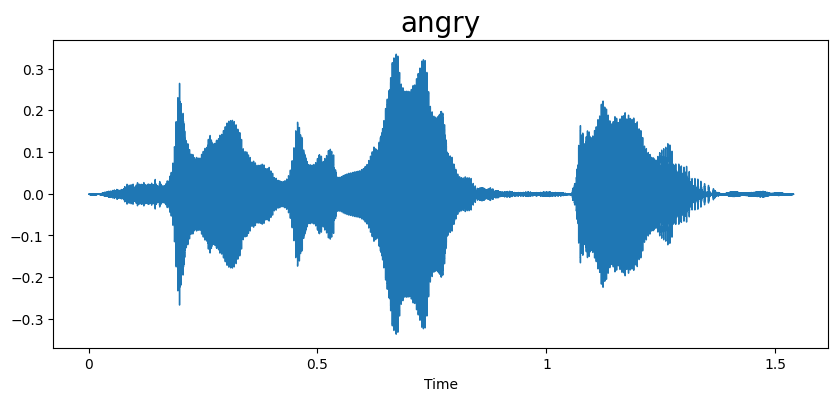

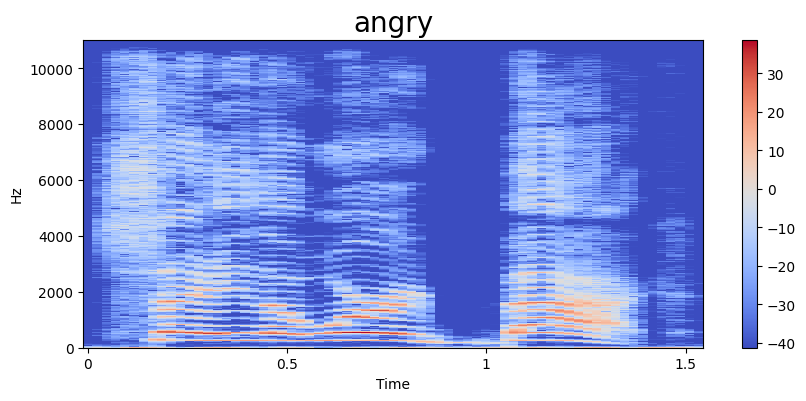

In [6]:

emotion="angry"
path=np.array(df["speech"][df["Labels"]==emotion])[0]
data, sampling_rate=librosa.load(path)
wave(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

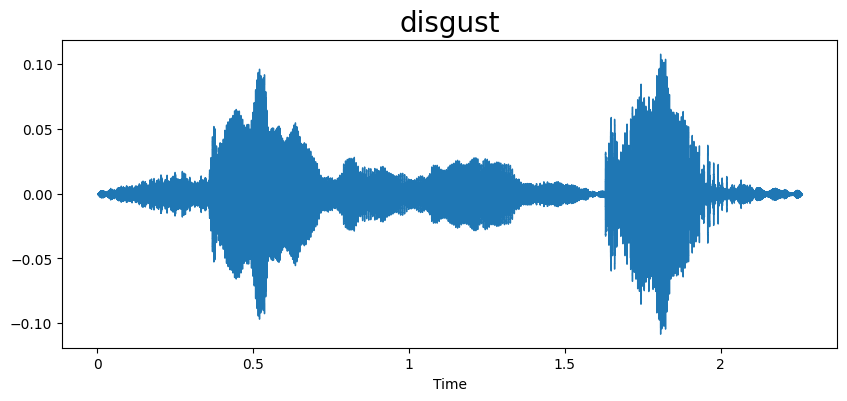

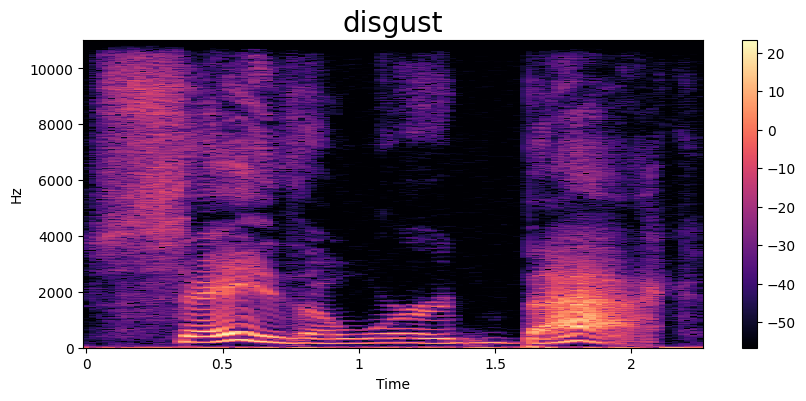

In [7]:
emotion='disgust'
path=np.array(df["speech"][df["Labels"]==emotion])[0]
data, sampling_rate=librosa.load(path)
wave(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

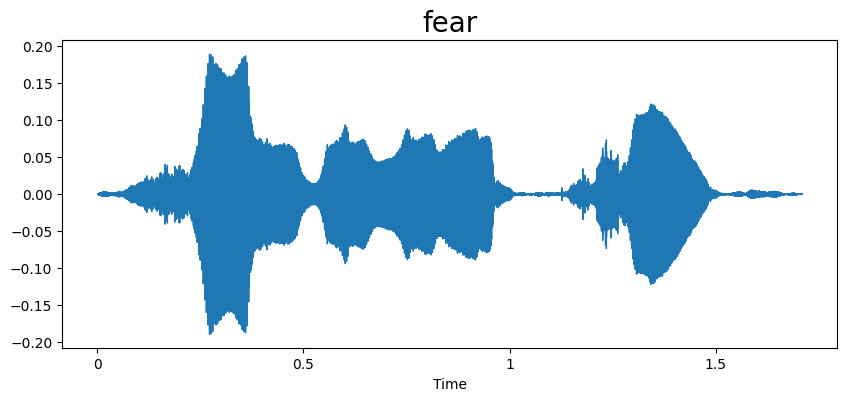

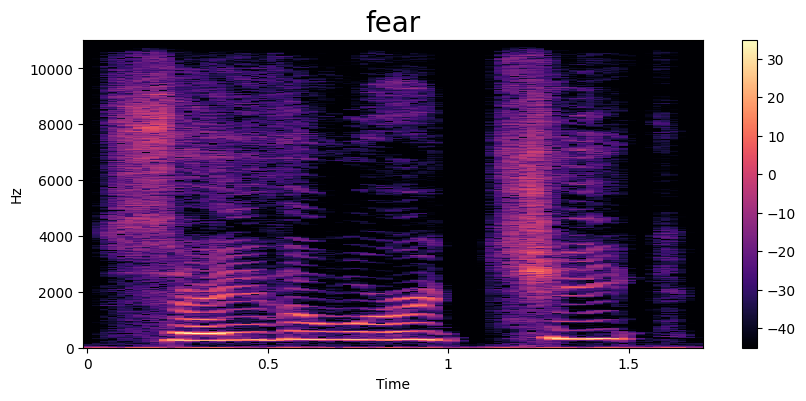

In [8]:
emotion='fear'
path=np.array(df["speech"][df["Labels"]==emotion])[0]
data, sampling_rate=librosa.load(path)
wave(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

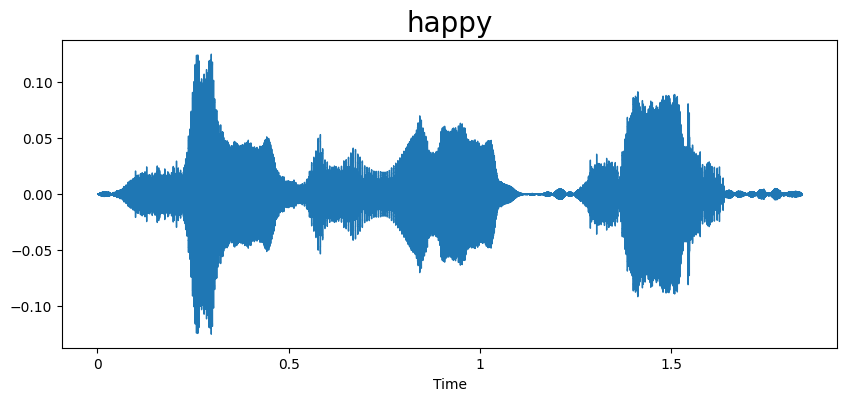

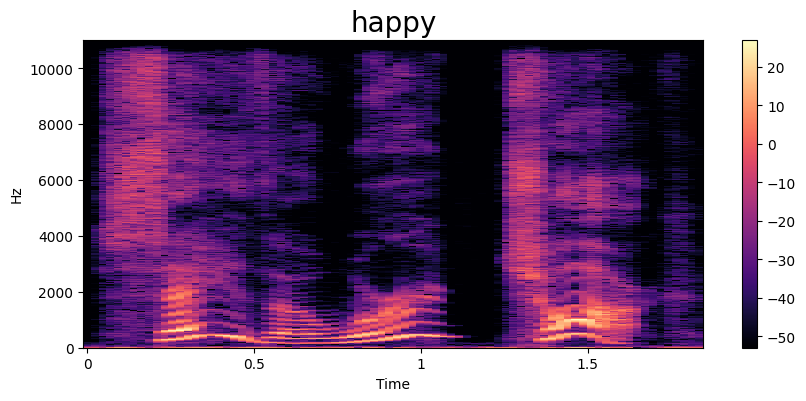

In [9]:
emotion='happy'
path=np.array(df["speech"][df["Labels"]==emotion])[0]
data, sampling_rate=librosa.load(path)
wave(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

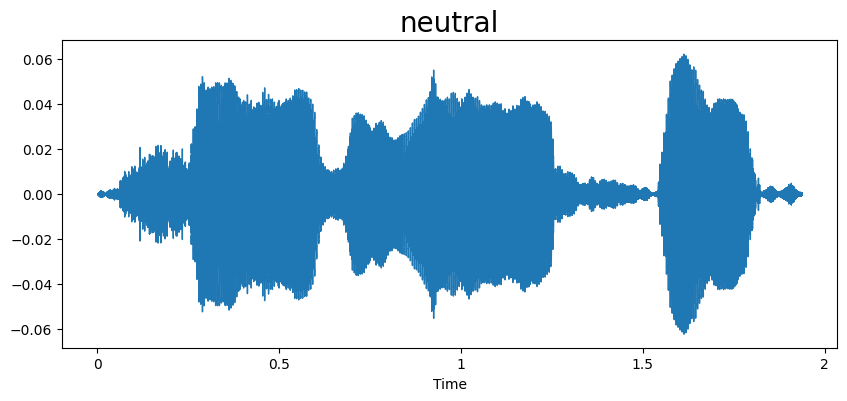

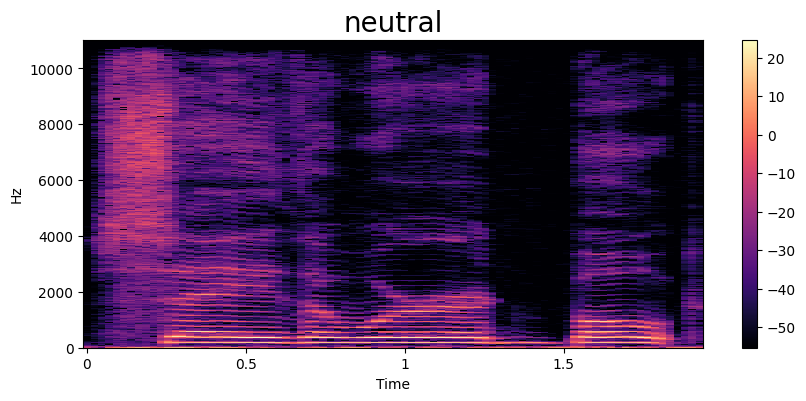

In [10]:
emotion='neutral'
path=np.array(df["speech"][df["Labels"]==emotion])[0]
data, sampling_rate=librosa.load(path)
wave(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

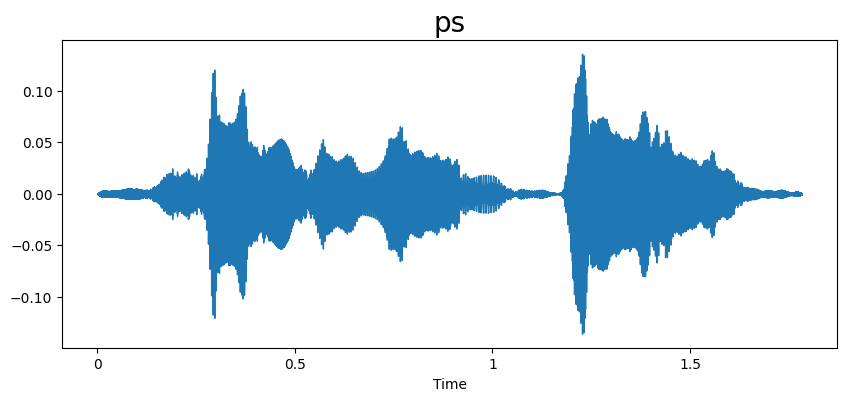

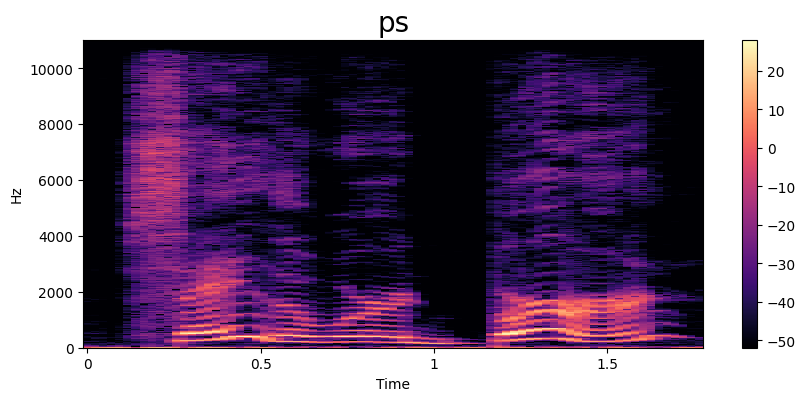

In [11]:
emotion='ps'
path=np.array(df["speech"][df["Labels"]==emotion])[0]
data, sampling_rate=librosa.load(path)
wave(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

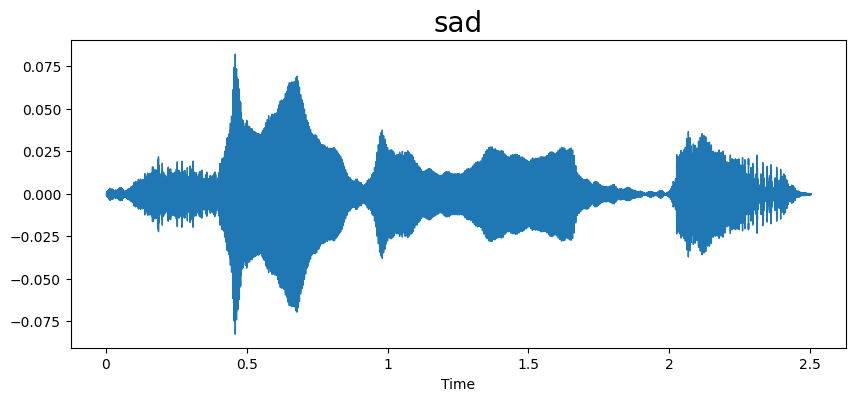

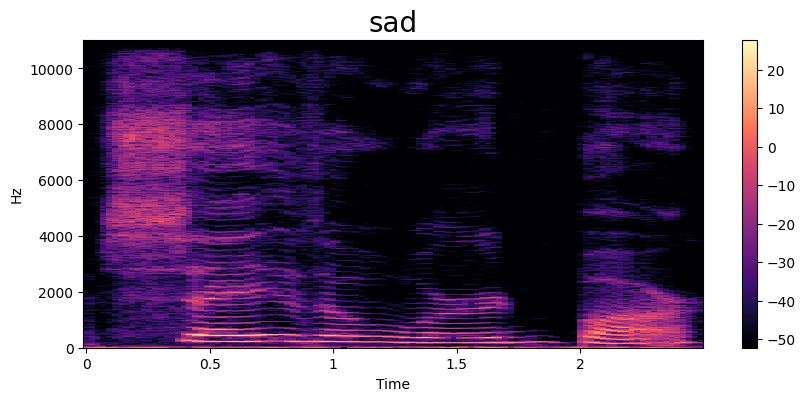

In [12]:
emotion='sad'
path=np.array(df["speech"][df["Labels"]==emotion])[0]
data, sampling_rate=librosa.load(path)
wave(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [13]:
def extract_mfcc(filename):
    y, sr=librosa.load(filename, duration=3, offset=.05)
    mfcc=np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50).T, axis=0)
    return mfcc

In [14]:
df['speech'][1059]

'C:\\Users\\Acer\\Downloads\\archive (25)\\TESS Toronto emotional speech set data\\YAF_fear\\YAF_mess_fear.wav'

In [15]:
x_mfcc=df["speech"].apply(lambda x: extract_mfcc(x))

In [16]:
x_mfcc

0       [-377.57736, 54.670944, -18.43741, -13.324413,...
1       [-437.90604, 67.84664, -2.9070852, -21.546589,...
2       [-395.56973, 27.30534, -5.2742143, -0.822711, ...
3       [-378.21268, 54.256943, -12.022247, -14.986525...
4       [-391.7206, 53.965458, 2.5754898, 7.8340316, 4...
                              ...                        
1535    [-397.7212, 60.38442, 33.572906, 25.049873, 6....
1536    [-385.55795, 69.218994, 23.204502, 19.194386, ...
1537    [-372.29965, 55.693417, 36.352085, 24.540262, ...
1538    [-337.2753, 71.01999, 30.475266, 26.323053, -4...
1539    [-382.05377, 35.304234, 30.434166, 32.152035, ...
Name: speech, Length: 1540, dtype: object

In [17]:
X=[x for x in x_mfcc]
X=np.array(X)
X.shape

(1540, 50)

In [18]:
X=np.expand_dims(X, -1)
X.shape

(1540, 50, 1)

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[["Labels"]])

In [20]:
y=y.toarray()

In [21]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
y.shape

(1540, 7)

# VALIDATION

In [23]:
import os
paths=[]
labels=[]
for dirname, _, filenames in os.walk("C:\\Users\\Acer\\Downloads\\archive (25)\\Validation"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split("_")[-1]
        label=label.split(".")[0]
        labels.append(label.lower())
print("Dataset is loaded")

Dataset is loaded


In [24]:
df_valid=pd.DataFrame()
df_valid['speech']=paths
df_valid['Labels']=labels
df_valid.head()

,speech,Labels
0,C:\Users\Acer\Downloads\archive (25)\Validatio...,angry
1,C:\Users\Acer\Downloads\archive (25)\Validatio...,angry
2,C:\Users\Acer\Downloads\archive (25)\Validatio...,angry
3,C:\Users\Acer\Downloads\archive (25)\Validatio...,angry
4,C:\Users\Acer\Downloads\archive (25)\Validatio...,angry


In [25]:
x_mfcc_valid=df_valid["speech"].apply(lambda x: extract_mfcc(x))
x_mfcc_valid

0      [-413.22812, 64.65096, -3.4124396, -7.8535438,...
1      [-393.51782, 56.604366, -1.6862867, -9.785713,...
2      [-419.37305, 67.0807, -4.4142885, -6.840945, -...
3      [-399.78696, 67.246796, 3.7586432, -15.700062,...
4      [-401.61456, 65.86871, 4.321726, -22.033781, -...
                             ...                        
835    [-390.60513, 62.61934, 34.881626, 42.80559, -2...
836    [-402.72894, 79.24326, 25.030973, 39.898453, 0...
837    [-368.21896, 66.4879, 38.06035, 41.148693, -4....
838    [-420.46988, 69.96347, 29.975704, 37.652958, -...
839    [-407.68646, 54.177113, 32.992718, 40.19907, 3...
Name: speech, Length: 840, dtype: object

In [26]:
X_valid=[x for x in x_mfcc_valid]
X_valid=np.array(X_valid)
X_valid.shape

(840, 50)

In [27]:
X_valid=np.expand_dims(X_valid, -1)
X_valid.shape

(840, 50, 1)

In [28]:
y_valid=enc.fit_transform(df_valid[["Labels"]])

In [29]:
y_valid=y_valid.toarray()

In [30]:
y_valid
y_valid.shape

(840, 7)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model=Sequential([LSTM(128, return_sequences=False, input_shape=(50, 1)),
Dense(64, activation='relu'),
Dropout(.02),

Dense(64, activation='relu'),
Dropout(.02),
Dense(7, activation='softmax')])
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,431 (310.28 KB)

 Trainable params: 79,431 (310.28 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history=model.fit(X, y, validation_data=(X_valid, y_valid), epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.2127 - loss: 1.9279 - val_accuracy: 0.3286 - val_loss: 1.8901
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.3086 - loss: 1.8768 - val_accuracy: 0.3607 - val_loss: 1.8558
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.3609 - loss: 1.8270 - val_accuracy: 0.4393 - val_loss: 1.8142
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.4288 - loss: 1.7955 - val_accuracy: 0.4619 - val_loss: 1.7394
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.4538 - loss: 1.7643 - val_accuracy: 0.4655 - val_loss: 1.6432
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.4518 - loss: 1.6217 - val_accuracy: 0.4893 - val_loss: 1.5235
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.4836 - loss: 1.4919 - val_accuracy: 0.5667 - val_loss: 1.3653
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.5449 - loss: 1.3300 - val_accuracy: 0.6000 - v

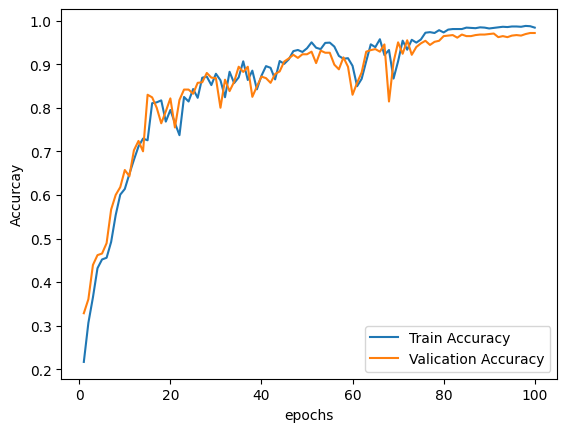

In [33]:
epochs=np.arange(1, 101)
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
plt.plot(epochs, acc, label="Train Accuracy")
plt.plot(epochs, val_acc, label="Valication Accuracy")
plt.ylabel('Accurcay')
plt.xlabel("epochs")
plt.legend()
plt.show()

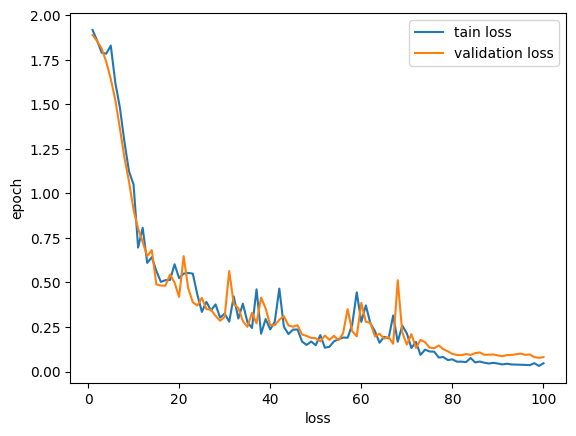

In [34]:
loss=history.history["loss"]
val_acc=history.history['val_loss']
plt.plot(epochs, loss, label='tain loss')
plt.plot(epochs, val_acc, label='validation loss')
plt.ylabel("epoch")
plt.xlabel("loss")
plt.legend()
plt.show()

# TESTING

In [35]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk("C:\\Users\\Acer\\Downloads\\archive (25)\\Testing"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split("_")[-1]
        label=label.split(".")[0]
        labels.append(label.lower())
print("Dataset is loaded")

Dataset is loaded


In [36]:
df_test=pd.DataFrame()
df_test['speech']=paths
df_test['Labels']=labels
df_test.head()

,speech,Labels
0,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry
1,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry
2,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry
3,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry
4,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry


In [37]:
x_mfcc_test=df_test["speech"].apply(lambda x: extract_mfcc(x))

In [38]:
type(df_test["speech"])

pandas.core.series.Series

In [39]:
x_mfcc_test

0      [-383.16867, 62.010902, 19.093536, -0.626855, ...
1      [-393.86517, 45.86148, -5.9906116, -14.814474,...
2      [-362.68637, 51.458633, -11.164256, -21.063204...
3      [-430.58682, 80.08034, 5.446897, -19.015085, -...
4      [-417.77283, 65.903046, -19.64132, -14.895145,...
                             ...                        
415    [-342.7873, 90.723854, 25.029936, 15.087033, -...
416    [-351.48367, 60.984077, 22.978449, 38.650513, ...
417    [-358.92587, 70.540375, 26.106415, 31.461987, ...
418    [-343.40668, 73.01519, 16.19939, 27.718422, -1...
419    [-400.25632, 66.612656, 30.13948, 35.547478, -...
Name: speech, Length: 420, dtype: object

In [40]:
X_test=[x for x in x_mfcc_test]
X_test=np.array(X_test)
X_test.shape

(420, 50)

In [41]:
y_test = enc.transform(df_test[["Labels"]]).toarray()


In [42]:
y_test
y_pred=model.predict(X_test)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [43]:
y_pred

array([[9.9772996e-01, 4.2082040e-05, 2.6773445e-05, ..., 4.8089594e-05,
        4.9899074e-05, 1.9939502e-03],
       [9.9102646e-01, 1.3677559e-04, 6.6206362e-03, ..., 2.5214031e-05,
        6.1517443e-05, 4.0935785e-05],
       [9.9734443e-01, 4.3925251e-05, 1.7244738e-03, ..., 3.5575991e-05,
        2.8494687e-05, 9.6037227e-05],
       ...,
       [4.2546220e-04, 8.1896037e-03, 1.4164199e-06, ..., 2.3889427e-04,
        1.1620846e-04, 9.9102587e-01],
       [2.0796366e-03, 4.6738950e-03, 6.7533551e-07, ..., 1.2314484e-04,
        1.3975233e-04, 9.9298018e-01],
       [7.9588220e-04, 1.1048913e-03, 2.1222783e-07, ..., 1.4267197e-04,
        5.7962436e-05, 9.9789739e-01]], dtype=float32)

In [44]:
emo_arr=np.array(["angry", 'disgust','fear', "happy", "neutral", 'ps','sad'])
df_test

,speech,Labels
0,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry
1,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry
2,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry
3,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry
4,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry
...,...,...
415,C:\Users\Acer\Downloads\archive (25)\Testing\Y...,sad
416,C:\Users\Acer\Downloads\archive (25)\Testing\Y...,sad
417,C:\Users\Acer\Downloads\archive (25)\Testing\Y...,sad
418,C:\Users\Acer\Downloads\archive (25)\Testing\Y...,sad


In [45]:
emo_arr

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad'],
      dtype='<U7')

In [46]:
l=[]
for a in y_pred:
    z=a.argsort()
    l.append(emo_arr[z[-1]])
    
len(l)

420

In [47]:
df_test["Predicted"]=l

In [48]:

pd.set_option("display.max_rows", None)
df_test

,speech,Labels,Predicted
0,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry,angry
1,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry,angry
2,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry,angry
3,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry,angry
4,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry,angry
5,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry,angry
6,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry,angry
7,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry,angry
8,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry,angry
9,C:\Users\Acer\Downloads\archive (25)\Testing\O...,angry,angry


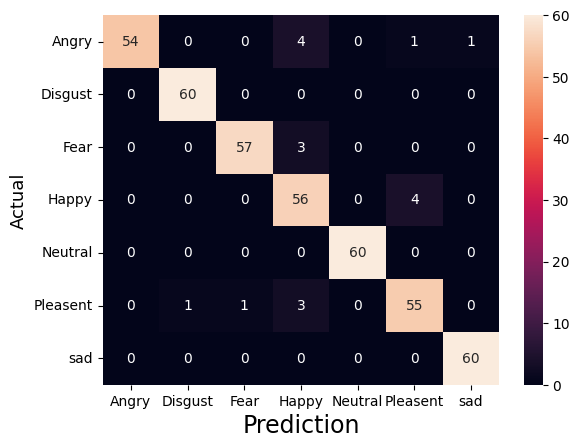

In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


actual =df_test["Labels"]
predicted = df_test["Predicted"]

cm=confusion_matrix(actual, predicted)

sns.heatmap(cm, annot=True, fmt='g',
           xticklabels=["Angry", "Disgust", "Fear","Happy","Neutral","Pleasent", "sad"],
           yticklabels=["Angry", "Disgust", "Fear","Happy","Neutral","Pleasent", "sad"])
plt.ylabel("Actual", fontsize=13)
plt.xlabel("Prediction", fontsize=17)
plt.show()


In [50]:
from sklearn.metrics import classification_report


report = classification_report(actual,predicted, target_names=["Angry", "Disgust", "Fear", "Happy", "Neutral", "Pleasant", "Sad"])

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       Angry       1.00      0.90      0.95        60
     Disgust       0.98      1.00      0.99        60
        Fear       0.98      0.95      0.97        60
       Happy       0.85      0.93      0.89        60
     Neutral       1.00      1.00      1.00        60
    Pleasant       0.92      0.92      0.92        60
         Sad       0.98      1.00      0.99        60

    accuracy                           0.96       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.96      0.96      0.96       420



In [ ]:
from sklearn.metrics import classification_report
report= classification_report(actual, predicted, target_names=["Angry","Disgust","Fear","Happy","Neutral","Pleasant","Sad"])
print("Classification Report:")
print(report)